## Import Libraries

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import math

## Load Dataset

In [2]:
import pandas as pd
df = pd.read_csv("data/Iris.csv")
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [3]:
X = df.drop(columns=['Id','Species'])
y = df.Species

In [4]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [5]:
# load Iris dataset from sklearn
from sklearn.datasets import load_iris
data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names
target_names = data.target_names
print(target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
X.shape

(150, 4)

In [7]:
X[1]

array([4.9, 3. , 1.4, 0.2])

In [8]:
v1 = X[0]
v2 = X[1]
v3 = X[2]

In [9]:
v1 + (v2 + v3)

array([14.7,  9.7,  4.1,  0.6])

In [10]:
(v1 + v2) + v3

array([14.7,  9.7,  4.1,  0.6])

In [11]:
v1 + (-1 * v1)

array([0., 0., 0., 0.])

In [12]:
0 * v1

array([0., 0., 0., 0.])

In [13]:
2 * (3*v1)

array([30.6, 21. ,  8.4,  1.2])

In [14]:
(2 + 3)*v1

array([25.5, 17.5,  7. ,  1. ])

In [15]:
2 * v1 + 3 * v1 

array([25.5, 17.5,  7. ,  1. ])

## Visualize vectors 

In [16]:
## 2-d visualization
v11 = v1[:2]
v22 = v2[:2]

In [17]:
v11

array([5.1, 3.5])

In [18]:
v22

array([4.9, 3. ])

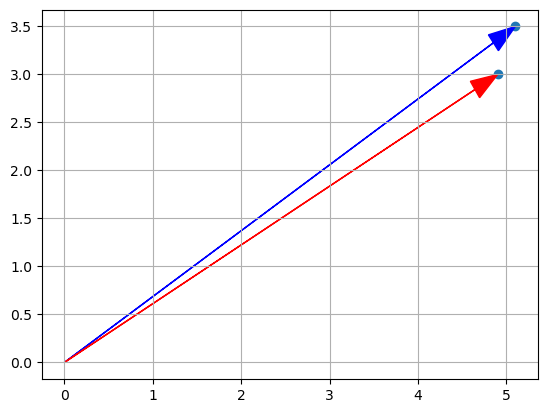

In [19]:
x, y = zip(v11, v22)
subplot = plt.subplot()
subplot.scatter(x,y)
subplot.arrow(0,0,v11[0],v11[1],head_length=0.3,head_width=0.2,color='blue',length_includes_head=True)
subplot.arrow(0,0,v22[0],v22[1],head_length=0.3,head_width=0.2,color='red',length_includes_head=True)
subplot.grid()
plt.show()

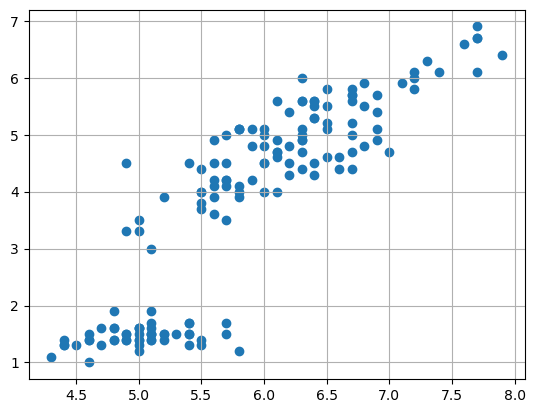

In [20]:
x, y = X[:,0], X[:,2] 
subplot = plt.subplot()
subplot.scatter(x,y)
subplot.grid()
plt.show()

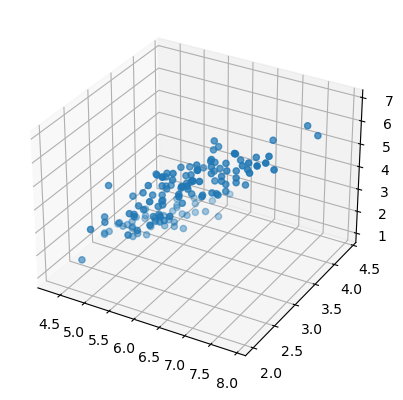

In [21]:
## 3-d visualization
x, y, z = X[:,0], X[:,1], X[:,2]
subplot = plt.subplot(projection='3d')
subplot.scatter(x,y,z)
plt.show()

## Norm of a vector

In [22]:
def my_norm(vector, p=2):
    s = 0
    for i in range(len(vector)):
        s += vector[i]**p
    return s**(1/p)

In [23]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [24]:
my_norm(X[0])

6.345076831686122

In [25]:
x = np.array([1, -2, 4])
my_norm(x)

4.58257569495584

In [26]:
x = [4 , -4, -1, 2]
p = 4
my_norm(x, p=4)

4.795831523312719

In [27]:
np.linalg.norm(x,4)

4.795831523312719

## Dot Product of vectors

In [28]:
def inner_product(vector1,vector2):
    s = 0
    for i in range(len(vector1)):
        s += vector1[i]*vector2[i]
    return s

In [29]:
inner_product(X[0],X[1])

37.489999999999995

In [30]:
np.dot(X[0],X[1])

37.489999999999995

In [31]:
X[0].dot(X[1])

37.489999999999995

## Calculate angle between vectors

In [32]:
def cal_angle(vector1, vector2):
    prod = inner_product(vector1,vector2)
    n1 = my_norm(vector1)
    n2 = my_norm(vector2)
    theta = np.arccos(prod/(n1*n2))
    return theta * 180 / np.pi

In [33]:
x = [1,-1,2]
y = [5,2,7]
cal_angle(x,y)

38.2029290645368

In [34]:
x = [0,5,0]
y = [1,0,0]
cal_angle(x,y)

90.0

## Unit vectors

In [35]:
x = np.array([3,7,5,-2])
x_unit = x / np.linalg.norm(x)
x_unit

array([ 0.32163376,  0.75047877,  0.53605627, -0.21442251])

In [36]:
np.linalg.norm(x_unit)

0.9999999999999999

In [37]:
unit_vector_X =  X[0]/ np.linalg.norm(X[0])
unit_vector_X

array([0.80377277, 0.55160877, 0.22064351, 0.0315205 ])

## Calculate distance between vectors 

In [38]:
## Euclidean distance

def euclidean_distance(vector1, vector2):
    s = 0
    for i in range(len(vector1)):
        s += (vector2[i] - vector1[i])**2
    return s**0.5

In [39]:
euclidean_distance(vector1=X[0],vector2=X[1])

0.5385164807134502

In [40]:
euclidean_distance(vector1=X[1],vector2=X[0])

0.5385164807134502

In [41]:
x, y, z = X[0], X[1], X[1]
distxy = euclidean_distance(x,y)
distyz = euclidean_distance(y,z)
distxz = euclidean_distance(x,z)

In [42]:
distxy 

0.5385164807134502

In [43]:
distyz + distxz

0.5385164807134502

In [44]:
math.dist(X[0],X[1])

0.5385164807134502

In [45]:
from scipy.spatial import distance
distance.euclidean(X[0],X[1])

0.5385164807134502

In [46]:
## Manhattan distance

def manhattan_distance(vector1,vector2):
    s = 0
    for i in range(len(vector1)):
        s += abs(vector1[i] - vector2[i])
    return s

In [47]:
manhattan_distance(X[0],X[1])

0.6999999999999993

In [48]:
manhattan_distance(X[1],X[0])

0.6999999999999993

In [49]:
x, y, z = X[0], X[1], X[2]
distxy = manhattan_distance(x,y)
distyz = manhattan_distance(y,z)
distxz = manhattan_distance(x,z)

In [50]:
distxy

0.6999999999999993

In [51]:
distxz + distyz

1.2999999999999994

In [52]:
## Exercise
X_0, X_1, X_2 = X[:50,:], X[50:100,:], X[100:,:]
print(X_0.shape, X_1.shape, X_2.shape)

(50, 4) (50, 4) (50, 4)


In [53]:
dist11 = euclidean_distance(X_0[0],X_0[1])
dist22 = euclidean_distance(X_1[0],X_1[1])
dist33 = euclidean_distance(X_2[0],X_2[1])

In [54]:
print(dist11, dist22, dist33)

0.5385164807134502 0.6403124237432847 1.3341664064126335


In [55]:
dist12 = euclidean_distance(X_0[0],X_1[0])
dist23 = euclidean_distance(X_1[0],X_2[0])
dist31 = euclidean_distance(X_2[0],X_0[0])

In [56]:
print(dist12,dist23,dist31)

4.003748243833521 1.8439088914585773 5.2848841046895245


In [57]:
dist11 = manhattan_distance(X_0[0],X_0[1])
dist22 = manhattan_distance(X_1[0],X_1[1])
dist33 = manhattan_distance(X_2[0],X_2[1])

In [58]:
print(dist11, dist22, dist33)

0.6999999999999993 0.8999999999999999 2.6


In [59]:
dist12 = manhattan_distance(X_0[0],X_1[0])
dist23 = manhattan_distance(X_1[0],X_2[0])
dist31 = manhattan_distance(X_2[0],X_0[0])

In [60]:
print(dist12,dist23,dist31)

6.7 3.1999999999999997 8.3


In [61]:
x = [5,2,7]
y = [1,-1,2]
print("Euclidean Distance", euclidean_distance(x,y))
print("Manhattan Distance", manhattan_distance(x,y))

Euclidean Distance 7.0710678118654755
Manhattan Distance 12


In [62]:
## weighted euclidean distance
def wt_euclidean_distance(vector1,vector2,weight):
    s = 0
    for i in range(len(vector1)):
        s += weight[i]*(vector1[i]-vector2[i])**2 
    return s**0.5

In [63]:
w = [0.5,3,1.5,0.001]
wt_euclidean_distance(X[0],X[1],w)

0.8774964387392121

In [64]:
euclidean_distance(X[0],X[1])

0.5385164807134502

In [65]:
dist11 = wt_euclidean_distance(X_0[0],X_0[1],w)
dist22 = wt_euclidean_distance(X_1[0],X_1[1],w)
dist33 = wt_euclidean_distance(X_2[0],X_2[1],w)

In [66]:
print(dist11,dist22,dist33)

0.8774964387392121 0.4899081546575847 1.5557506226898963


In [67]:
dist12 = wt_euclidean_distance(X_0[0],X_1[0],w)
dist23 = wt_euclidean_distance(X_1[0],X_2[0],w)
dist31 = wt_euclidean_distance(X_2[0],X_0[0],w)

In [68]:
print(dist12,dist23,dist31)

4.29085539257617 1.676666335321372 5.708352652035437


## Generate random Matrix

In [69]:
A = np.random.randn(10,10)
A

array([[-1.26321766,  0.9831675 , -0.55728733, -1.21116788, -0.12231262,
         1.08376514, -0.49240554,  1.45703026,  0.23533565,  0.0348162 ],
       [ 0.91729917, -1.56104632,  0.54444366,  1.37745357,  1.4934109 ,
         1.30712241, -0.48867248, -0.37711343,  0.44753409,  0.36920375],
       [ 0.4073066 ,  0.46351296,  0.54473327,  0.33805658,  2.15860114,
        -0.52227362,  0.6287359 , -1.61354027,  0.08091114, -0.71958832],
       [ 0.45215441,  0.70309726, -0.99136823, -0.56077938, -0.54840507,
        -0.86876606,  0.56984827,  1.34059531,  0.49695392, -2.20338337],
       [ 1.04285655,  1.35841952,  0.00547241, -1.06509685,  0.79210062,
        -0.55590201, -0.61752388,  0.84408784,  3.00893446, -0.75946361],
       [-0.91685309,  1.17226324,  1.11830473, -0.97532124,  0.66119791,
        -0.62793635, -0.65478669,  0.87637128, -0.80407491, -0.8402735 ],
       [ 0.1191013 ,  1.41511254, -1.35711099,  0.92869003, -0.59251229,
         2.24854772,  0.68484752,  0.10062591

In [70]:
A[0:3,0:3]

array([[-1.26321766,  0.9831675 , -0.55728733],
       [ 0.91729917, -1.56104632,  0.54444366],
       [ 0.4073066 ,  0.46351296,  0.54473327]])

In [71]:
v = np.random.randn(1,100)
v

array([[ 0.28086496,  1.59425722,  0.22579939, -1.6513784 , -0.82115611,
         1.30126929, -0.43528857, -1.29734962,  0.92557751, -0.5778605 ,
        -0.32619104,  0.51009399,  1.0216049 ,  1.07833377, -0.25898891,
        -1.35771044, -0.60410359, -0.31194251,  0.53769252,  0.46155889,
         1.1139662 , -0.53561503, -0.45072103,  0.46037914, -2.53150559,
        -0.75900049,  0.59795271,  1.63529227,  0.45377118,  0.72206562,
         0.29835273, -1.39606046, -0.03782041,  0.13114165,  0.4405544 ,
         0.6847344 , -1.7354616 , -1.0245389 , -0.33391419, -0.68204284,
        -0.822761  , -0.00920989,  0.2744071 , -0.21299255,  1.43248359,
        -0.50991075,  0.56956977, -0.59703319,  0.14027996, -0.84773635,
         0.89513542,  0.84504858,  0.86568969,  0.28942644,  0.65520498,
         0.3366381 , -1.58637993,  0.2862819 , -0.59963991,  0.49395543,
         0.93502433,  0.61733493, -0.05201832, -1.14859359, -0.9679634 ,
         1.17731883, -0.64502287, -1.11902531,  1.3

In [72]:
R = np.resize(v,(5,20))
R

array([[ 0.28086496,  1.59425722,  0.22579939, -1.6513784 , -0.82115611,
         1.30126929, -0.43528857, -1.29734962,  0.92557751, -0.5778605 ,
        -0.32619104,  0.51009399,  1.0216049 ,  1.07833377, -0.25898891,
        -1.35771044, -0.60410359, -0.31194251,  0.53769252,  0.46155889],
       [ 1.1139662 , -0.53561503, -0.45072103,  0.46037914, -2.53150559,
        -0.75900049,  0.59795271,  1.63529227,  0.45377118,  0.72206562,
         0.29835273, -1.39606046, -0.03782041,  0.13114165,  0.4405544 ,
         0.6847344 , -1.7354616 , -1.0245389 , -0.33391419, -0.68204284],
       [-0.822761  , -0.00920989,  0.2744071 , -0.21299255,  1.43248359,
        -0.50991075,  0.56956977, -0.59703319,  0.14027996, -0.84773635,
         0.89513542,  0.84504858,  0.86568969,  0.28942644,  0.65520498,
         0.3366381 , -1.58637993,  0.2862819 , -0.59963991,  0.49395543],
       [ 0.93502433,  0.61733493, -0.05201832, -1.14859359, -0.9679634 ,
         1.17731883, -0.64502287, -1.11902531,  

## Matrix Transpose

In [73]:
A = np.array([[2,3,5],[1,-4,1],[0,0,3]])
A

array([[ 2,  3,  5],
       [ 1, -4,  1],
       [ 0,  0,  3]])

In [74]:
A.T

array([[ 2,  1,  0],
       [ 3, -4,  0],
       [ 5,  1,  3]])

In [75]:
np.transpose(A)

array([[ 2,  1,  0],
       [ 3, -4,  0],
       [ 5,  1,  3]])

## Generate symmetric matrix

In [76]:
A = np.random.randn(5,5)
A

array([[-0.33382282, -0.1248533 ,  1.82458519,  2.32836534, -0.35317583],
       [-0.31572785,  1.04882298,  1.38611759, -0.40119038, -1.53732325],
       [-0.45287476, -0.68686501,  0.21453276,  1.28853735, -0.43698243],
       [-0.04434981, -1.03195563, -0.69952597,  0.0701679 ,  0.8243761 ],
       [ 0.81355273,  0.99538901, -0.28620762, -0.10889768, -0.29299166]])

In [77]:
B = A + A.T
B

array([[-0.66764563, -0.44058115,  1.37171043,  2.28401553,  0.4603769 ],
       [-0.44058115,  2.09764595,  0.69925257, -1.43314601, -0.54193424],
       [ 1.37171043,  0.69925257,  0.42906553,  0.58901139, -0.72319005],
       [ 2.28401553, -1.43314601,  0.58901139,  0.1403358 ,  0.71547842],
       [ 0.4603769 , -0.54193424, -0.72319005,  0.71547842, -0.58598332]])

In [78]:
B.T

array([[-0.66764563, -0.44058115,  1.37171043,  2.28401553,  0.4603769 ],
       [-0.44058115,  2.09764595,  0.69925257, -1.43314601, -0.54193424],
       [ 1.37171043,  0.69925257,  0.42906553,  0.58901139, -0.72319005],
       [ 2.28401553, -1.43314601,  0.58901139,  0.1403358 ,  0.71547842],
       [ 0.4603769 , -0.54193424, -0.72319005,  0.71547842, -0.58598332]])

## Matrix Operations
### Scalar Multiplication

In [79]:
A = np.array([[2,3,5],[1,-4,1],[0,0,3]])
A

array([[ 2,  3,  5],
       [ 1, -4,  1],
       [ 0,  0,  3]])

In [80]:
1.5*A

array([[ 3. ,  4.5,  7.5],
       [ 1.5, -6. ,  1.5],
       [ 0. ,  0. ,  4.5]])

In [81]:
A*1.5

array([[ 3. ,  4.5,  7.5],
       [ 1.5, -6. ,  1.5],
       [ 0. ,  0. ,  4.5]])

### Matix Addition

In [82]:
A = np.array([[1,5,2],[-2,3,7]])
B = np.array([[2,-3,7],[-1,-2,6]])
A+B

array([[ 3,  2,  9],
       [-3,  1, 13]])

In [83]:
2*A - 3*B

array([[ -4,  19, -17],
       [ -1,  12,  -4]])

In [84]:
A = np.random.randn(3,5)
B = np.random.randn(3,5)
2*(A+B) 

array([[-2.21066227, -0.35954744,  1.89317705,  0.8194896 ,  2.97485877],
       [-0.89330593, -1.69408956,  4.49037069,  1.96549976,  1.4390563 ],
       [-2.07714813, -0.04773694, -3.07086866,  1.00466541, -2.15236606]])

In [85]:
2*A + 2*B 

array([[-2.21066227, -0.35954744,  1.89317705,  0.8194896 ,  2.97485877],
       [-0.89330593, -1.69408956,  4.49037069,  1.96549976,  1.4390563 ],
       [-2.07714813, -0.04773694, -3.07086866,  1.00466541, -2.15236606]])

In [86]:
A = np.array([[1,3,-2],[3,1,4]])
x = np.array([[2],[5],[1]])
print("shape of A:",A.shape)
print("shape of x",x.shape)

shape of A: (2, 3)
shape of x (3, 1)


In [87]:
x = 2*x

In [88]:
2*np.matmul(A,x)

array([[60],
       [60]])

### Matrix Multiplication

In [89]:
A = np.array([[1,2,-3],[7,-1,2]])
B = np.array([[-2,5],[2,-1],[1,3]])
np.matmul(A,B)

array([[ -1,  -6],
       [-14,  42]])

In [90]:
A.shape

(2, 3)

In [91]:
B.shape

(3, 2)

In [92]:
np.matmul(B,A)

array([[33, -9, 16],
       [-5,  5, -8],
       [22, -1,  3]])

In [93]:
A = np.random.randn(3,3)
B = A + A.T
np.matmul(A,B)

array([[ 1.8477301 , -3.39698319, -0.9426459 ],
       [ 0.45604135,  2.89579687, -2.09236292],
       [-2.20331673, -3.25745659,  9.4766252 ]])

In [94]:
np.matmul(B,A)

array([[ 2.35847246, -4.258908  , -3.00874129],
       [-0.40588346,  6.52268196,  2.95014034],
       [-4.26941212,  1.78504666,  5.33899775]])

In [95]:
A = np.random.randn(3,3)
B = np.random.randn(3,3)
C = np.random.randn(3,3)

In [96]:
np.matmul(A,np.matmul(B,C))

array([[-3.25413378,  0.09201827, -2.76620827],
       [ 0.46818743, -0.16772069,  0.51622854],
       [-0.87390784, -0.30951432, -0.47250941]])

In [97]:
np.matmul(np.matmul(A,B),C)

array([[-3.25413378,  0.09201827, -2.76620827],
       [ 0.46818743, -0.16772069,  0.51622854],
       [-0.87390784, -0.30951432, -0.47250941]])

In [98]:
np.matmul(A,(B + C))

array([[ 1.31177245,  0.38537753,  2.02835495],
       [-0.44035855,  0.07904649, -0.62713097],
       [-0.11520474,  0.35519327, -0.04050817]])

In [99]:
np.matmul(A,B) + np.matmul(A,C)

array([[ 1.31177245,  0.38537753,  2.02835495],
       [-0.44035855,  0.07904649, -0.62713097],
       [-0.11520474,  0.35519327, -0.04050817]])

In [100]:
np.matmul((A+ B),C)

array([[ 3.29900896, -3.99001437,  7.27999147],
       [-1.17957524, -1.00406822,  0.0290102 ],
       [-1.52776247, -2.13025036,  1.18499908]])

In [101]:
np.matmul(A, C) + np.matmul(B, C)

array([[ 3.29900896, -3.99001437,  7.27999147],
       [-1.17957524, -1.00406822,  0.0290102 ],
       [-1.52776247, -2.13025036,  1.18499908]])

In [102]:
np.matmul(A,B).T

array([[ 0.1209152 ,  0.26837224,  0.56797599],
       [ 2.67874521, -0.26268864,  0.97425642],
       [-1.6327603 ,  0.3470379 , -0.21483683]])

In [103]:
np.matmul(A.T,B.T)

array([[-0.24339943, -0.42074632,  0.53463183],
       [ 0.90764088,  0.81350449,  0.5668739 ],
       [-0.3036839 , -0.09022287, -0.92671533]])

In [104]:
np.matmul(B.T,A.T)

array([[ 0.1209152 ,  0.26837224,  0.56797599],
       [ 2.67874521, -0.26268864,  0.97425642],
       [-1.6327603 ,  0.3470379 , -0.21483683]])

In [105]:
np.matmul(A,B,C).T

array([[ 0.1209152 ,  0.26837224,  0.56797599],
       [ 2.67874521, -0.26268864,  0.97425642],
       [-1.6327603 ,  0.3470379 , -0.21483683]])

In [106]:
np.matmul(C.T,B.T,A.T)

array([[ 0.58389474,  0.53635568,  0.35415966],
       [ 0.8402158 ,  1.20092351, -1.17483881],
       [-0.10378298, -0.40220926,  0.98680297]])

## Transformation Matrix

#### create two 2X1 vector and project them in 3D space using a transformation matrix. Check the Euclidean distance of original vector and transformed vector. and plot using matplotib

### this uses . Product by using @

In [107]:
trans_matrix = np.array([[3, 4],
       [7, 1],
       [1, 4]])

In [108]:
print(trans_matrix)

[[3 4]
 [7 1]
 [1 4]]


In [109]:
v7=np.random.randint(1,10,(2,1))
v8=np.random.randint(1,10,(2,1))
print (v7)
print(v8)

[[1]
 [4]]
[[1]
 [4]]


In [110]:
v7=np.random.randint(1,10,(2,1))
v8=np.random.randint(1,10,(2,1))
print (v7)
print(v8)

[[8]
 [1]]
[[5]
 [8]]


In [111]:
v7_trans=trans_matrix@v7
print(v7_trans)
print(v7_trans.shape)

[[28]
 [57]
 [12]]
(3, 1)


In [112]:
v8_trans=trans_matrix@v8
print(v8_trans)

[[47]
 [43]
 [37]]


In [113]:
print(distance.euclidean(v7.reshape(2),v8.reshape(2)))

7.615773105863909


In [114]:
print(distance.euclidean(v7_trans.reshape(3),v8_trans.reshape(3)))

34.38022687534217


## Determinant of a Matrix

In [115]:
A = np.array([[1,-2,5],[7,-3,2],[-1,2,0]])
np.linalg.det(A)

55.000000000000014

In [116]:
A = np.array([[5,2,7],[-5,-2,-7],[10,4,14]])
np.linalg.det(A)

0.0

## Matrix Inverse

In [117]:
A = np.array([[1,-2,5],[7,-3,2],[-1,2,0]])
np.linalg.inv(A)

array([[-0.07272727,  0.18181818,  0.2       ],
       [-0.03636364,  0.09090909,  0.6       ],
       [ 0.2       ,  0.        ,  0.2       ]])

In [175]:
A = np.array([[5,2,7],[-5,-2,-7],[10,4,14]])
A

array([[ 5,  2,  7],
       [-5, -2, -7],
       [10,  4, 14]])

In [176]:
np.linalg.inv(A)

#This is expected to return an error/exception of singular matrix

LinAlgError: Singular matrix

#### Perturbation

In [ ]:
delta = 0.02
A = A + delta

In [ ]:
A

In [ ]:
np.linalg.det(A)

In [ ]:
np.linalg.inv(A)

## Linear Equation Solving 

In [ ]:
## x - 2y + 5z = 2
## 7x -3y + 2z = 5
## 2y -x = 3

A = np.array([[1,-2,5],[7,-3,2],[-1,2,0]])
b = np.array([[2],[5],[3]])

In [ ]:
x = np.matmul(np.linalg.inv(A),b)
x

In [ ]:
## 5x+3y +4z = 11
## 2x+y+z = 3 
## 4x+7y +5z=17

A = np.array([[5,3,4],[2,1,1],[4,7,5]])
b = np.array([[11],[3],[17]])

In [ ]:
x = np.matmul(np.linalg.inv(A),b)
x

In [ ]:
##a + 3b + 2c + 2d = 1
##2a + b + c + 2d = 0
##3a + b + 2c + d = 1
##2a + c + 3d = 0

A = np.array([[1,3,2,2],[2,1,1,2],[3,1,2,1],[2,0,1,3]])
b = np.array([[1],[0],[1],[0]])

In [ ]:
x = np.matmul(np.linalg.inv(A),b)
x

## Trace of a sqaure Matrix

In [ ]:
def my_trace(M):
    s = 0
    for i in range(M.shape[0]):
        s += M[i][i]
    return s

In [ ]:
M.shape

In [ ]:
row, col = M.shape
print(col)

In [ ]:
M = np.array([[4,5],[6,7]])
my_trace(M)

In [ ]:
A = np.random.randn(4,4)
my_trace(A)

In [122]:
A.trace()

17

In [123]:
np.trace(A)

17

In [124]:
Matrix= np.array([[4,5],[6,7]])
Matrix.trace()

11

## Convert a vector to Diagonal Matrix

In [125]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [126]:
def vec_to_diag_mat(v):
    M = np.zeros((len(v),len(v)))
    for i in range(len(v)):
        M[i][i] = v[i]
    return M

In [127]:
v = np.array([1,2,3])
vec_to_diag_mat(v)

array([[1., 0., 0.],
       [0., 2., 0.],
       [0., 0., 3.]])

In [128]:
## Alternate Method but avoid using unnessary loops
def diagonal_M(v):
    M = np.zeros((len(v),len(v)))
    row, col = M.shape
    for i in range(row):
        for j in range(col):
            if i == j:
                M[i][i] = v[i]
            else:
                M[i][j] = 0
    return M

In [129]:
diagonal_M(v)

array([[1., 0., 0.],
       [0., 2., 0.],
       [0., 0., 3.]])

In [130]:
np.diag([1,4,7,-2])

array([[ 1,  0,  0,  0],
       [ 0,  4,  0,  0],
       [ 0,  0,  7,  0],
       [ 0,  0,  0, -2]])

## Eigen Value and Eigen Vector

In [131]:
A = np.random.randn(3,3)
A

array([[ 0.94552998, -2.50131082, -1.00502215],
       [-0.05463448, -0.12032403,  1.9062376 ],
       [-0.29343444,  0.22691508, -1.02847678]])

In [132]:
def eig_val_vec(M):
    return np.linalg.eig(M)

In [133]:
values, vectors = eig_val_vec(A)

In [134]:
values

array([ 1.53563032+0.j        , -0.86945057+0.29625986j,
       -0.86945057-0.29625986j])

In [135]:
vectors

array([[-0.97556787+0.j        , -0.73522742+0.j        ,
        -0.73522742-0.j        ],
       [ 0.17893201+0.j        , -0.61243347+0.14882538j,
        -0.61243347-0.14882538j],
       [ 0.12747813+0.j        ,  0.19647625-0.1536684j ,
         0.19647625+0.1536684j ]])

$$ Ax = \lambda x$$

In [136]:
np.matmul(A, vectors[:,0])

array([-1.49811159+0.j,  0.27477343+0.j,  0.19575928+0.j])

In [137]:
values[0]*vectors[:,0]

array([-1.49811159+0.j,  0.27477343+0.j,  0.19575928+0.j])

In [138]:
np.linalg.norm(vectors[:,2])

1.0000000000000002

## Eigenvalues and Eigenvectors of a random symmetric Matrix

In [139]:
A = np.random.randn(2,2)
B = A + A.T
B

array([[ 0.44739265, -0.88273649],
       [-0.88273649,  1.95418989]])

In [140]:
values, vectors = eig_val_vec(B)

In [141]:
values

array([0.04025984, 2.3613227 ])

In [142]:
vectors

array([[-0.90807053,  0.41881729],
       [-0.41881729, -0.90807053]])

In [143]:
## Avoid comparing numbers with big decimal part
## precision ERROR!!
# trace is same as sum of Eigen values. Hence both values should be same.
if np.trace(B) == sum(values):
    print("Trace is equal to the sum of the eigen values")
else:
    print("Trace is not equal to the sum of the eigen values")

Trace is equal to the sum of the eigen values


In [144]:
if (np.trace(B) - sum(values)) < 0.0001:
    print("Trace is equal to the sum of the eigen values")
else:
    print("Trace is not equal to the sum of the eigen values")

Trace is equal to the sum of the eigen values


In [145]:
sum(values)

2.4015825381379603

In [146]:
np.trace(B)

2.4015825381379603

In [147]:
values[0]*values[1]

0.09506647971585283

In [148]:
np.linalg.det(B)

0.09506647971585265

In [152]:
# Determinant is same as product of Eigen vectors. Hence both values should be same.
print('product = ', values[0]*values[1])
print('determinant = ', np.linalg.det(B))

product =  0.09506647971585283
determinant =  0.09506647971585265


In [153]:
np.dot(vectors[:,0],vectors[:,1])

0.0

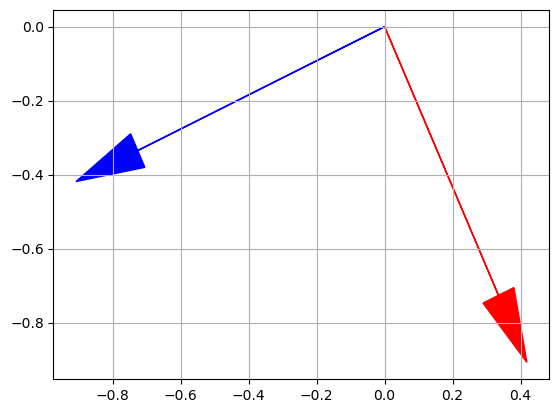

In [154]:
subplot = plt.subplot()
subplot.arrow(0,0,vectors[:,0][0],vectors[:,0][1],head_length=0.2,head_width=0.1,color='blue',length_includes_head=True)
subplot.arrow(0,0,vectors[:,1][0],vectors[:,1][1],head_length=0.2,head_width=0.1,color='red',length_includes_head=True)
subplot.grid()
plt.show()

## Positive(semi) Definite and Negative(semi) Definite Matrix

In [155]:
A = np.random.rand(3,3)
M = A+A.T

In [156]:
M

array([[0.64604085, 0.87430322, 0.66662755],
       [0.87430322, 0.45949631, 1.39917353],
       [0.66662755, 1.39917353, 0.90420464]])

In [157]:
def pos_neg_definite(M):
    values, vectors = eig_val_vec(M)
    count_positive = 0
    count_negative = 0
    count_positive_eigen = 0
    count_negative_eigen = 0
    
    for i in range(len(values)):
        if values[i] > 0:
            count_positive += 1
        else:
            count_negative += 1
        if np.matmul(np.matmul(vectors[:,i].T,M), vectors[:,i]) > 0:  ## x^t * A * x
            count_positive_eigen += 1
        else:
            count_negative_eigen += 1
    if count_negative == 0 and count_negative_eigen == 0:
        print("The given Matrix is a Positive Definite Matrix.")
    elif count_positive == 0 and count_positive_eigen == 0:
        print("The given Matrix is Negative Definite Matrix.")
    else:
        print("The given Matrix is neither Postive Definite nor Negative Definite Matrix.")

In [158]:
pos_neg_definite(M)

The given Matrix is neither Postive Definite nor Negative Definite Matrix.


In [159]:
M = np.array([[2,-1,0],[-1,2,-1],[0,-1,2]])
M

array([[ 2, -1,  0],
       [-1,  2, -1],
       [ 0, -1,  2]])

In [160]:
pos_neg_definite(M)

The given Matrix is a Positive Definite Matrix.


## Matrix Diagonalization

In [161]:
A = np.random.randn(5,5)
M = A + A.T

In [162]:
M   ## LHS

array([[-2.14770336,  0.68261541,  0.23699519, -0.85803841, -0.96242954],
       [ 0.68261541,  2.85243147,  1.41785634, -0.77676967, -0.01844057],
       [ 0.23699519,  1.41785634, -0.89715987,  0.51632557, -1.15517774],
       [-0.85803841, -0.77676967,  0.51632557,  1.93315256,  1.76802166],
       [-0.96242954, -0.01844057, -1.15517774,  1.76802166,  0.59910787]])

In [163]:
values, vectors = eig_val_vec(M)

In [164]:
values

array([-2.62165373, -2.24678921,  4.23808643,  0.3879218 ,  2.58226339])

In [165]:
vectors

array([[ 0.8029966 , -0.54556518,  0.21418828, -0.07726596,  0.07555422],
       [-0.20513182, -0.16708538,  0.65457877,  0.19741208, -0.68011654],
       [ 0.36333892,  0.67216217,  0.2250682 , -0.56259122, -0.2214007 ],
       [-0.08663067, -0.35671142, -0.55906595, -0.4835716 , -0.56467324],
       [ 0.41665016,  0.30886257, -0.40303794,  0.6361667 , -0.4047949 ]])

In [166]:
M_diag = np.diag(values)
M_diag

array([[-2.62165373,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -2.24678921,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  4.23808643,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.3879218 ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  2.58226339]])

In [167]:
Q = vectors

In [168]:
np.matmul(np.matmul(Q,M_diag), Q.T)   ## RHS of the equation

array([[-2.14770336,  0.68261541,  0.23699519, -0.85803841, -0.96242954],
       [ 0.68261541,  2.85243147,  1.41785634, -0.77676967, -0.01844057],
       [ 0.23699519,  1.41785634, -0.89715987,  0.51632557, -1.15517774],
       [-0.85803841, -0.77676967,  0.51632557,  1.93315256,  1.76802166],
       [-0.96242954, -0.01844057, -1.15517774,  1.76802166,  0.59910787]])

In [169]:
Q.T

array([[ 0.8029966 , -0.20513182,  0.36333892, -0.08663067,  0.41665016],
       [-0.54556518, -0.16708538,  0.67216217, -0.35671142,  0.30886257],
       [ 0.21418828,  0.65457877,  0.2250682 , -0.55906595, -0.40303794],
       [-0.07726596,  0.19741208, -0.56259122, -0.4835716 ,  0.6361667 ],
       [ 0.07555422, -0.68011654, -0.2214007 , -0.56467324, -0.4047949 ]])

In [170]:
np.linalg.inv(Q)

array([[ 0.8029966 , -0.20513182,  0.36333892, -0.08663067,  0.41665016],
       [-0.54556518, -0.16708538,  0.67216217, -0.35671142,  0.30886257],
       [ 0.21418828,  0.65457877,  0.2250682 , -0.55906595, -0.40303794],
       [-0.07726596,  0.19741208, -0.56259122, -0.4835716 ,  0.6361667 ],
       [ 0.07555422, -0.68011654, -0.2214007 , -0.56467324, -0.4047949 ]])

In [171]:
np.linalg.det(Q)

-0.9999999999999997

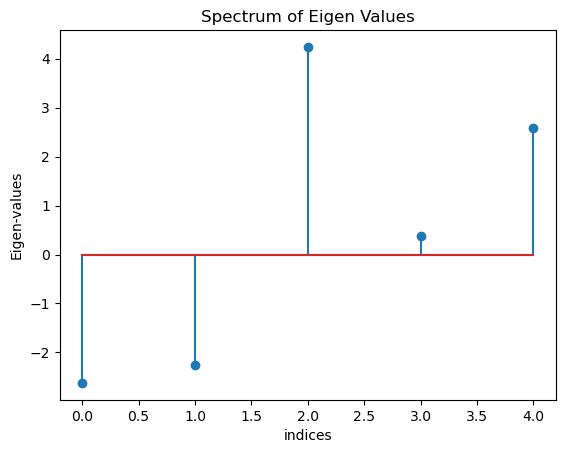

In [172]:
plt.figure()
plt.stem(values)
plt.title("Spectrum of Eigen Values")
plt.xlabel("indices")
plt.ylabel("Eigen-values")
plt.show()